
# Monty Hall problem

## Part 1: Simulate the game

Simulate the Monty Hall problem:
- Simulate three doors, one car, and two goats.
- Simulate three players: the switcher, the conservative, and the newcomer.
- Record who wins.
- Repeat it many times.
- Which player do you want to be?

In [68]:
# Single game, 3 doors, 1 opened by the host

import numpy as np

# Initialize the prizes:
doors = np.array(['goat', 'goat', 'car'])
np.random.shuffle(doors)

# The switcher and conservators choose the first door:
first_choice = np.random.randint(0, 3)

# Picking the winning door:
winning_door = np.where(doors=='car')[0][0]

# Choosing the door opened by the game host:
while(True):
    open_door = np.random.randint(0, 3)
    if (open_door != winning_door and open_door != first_choice): break

# The contestants choose their respective final doors:
conservator_door = first_choice

while(True): 
    switcher_door = np.random.randint(0, 3)
    if (switcher_door != first_choice and switcher_door != open_door): break
    
while(True):
    newcomer_door = np.random.randint(0, 3)
    if (newcomer_door != open_door): break

# Results:
print('The prizes behind each door are: ')
print(doors)
print('   1\t  2\t 3\n')

print('The winning door is: ' + str(winning_door+1))
print('The players choose the door: ' + str(first_choice+1))
print('The host opens the door: ' + str(open_door+1) + '\n')

print('The conservator keeps his door: ' + str(conservator_door+1))
print('The switcher chooses the other door: ' + str(switcher_door+1))
print('The newcomer chooses a door: ' + str(newcomer_door+1) + '\n')

print('And the winner is...')
if(conservator_door == winning_door):
    print('\tConservator WINS!')
    print('\tSwitcher loses...')
else:
    print('\tConservator loses...')
    print('\tswitcher WINS!')
if(newcomer_door == winning_door):
    print('\tNewcomer WINS!')
else:
    print('\tNewcomer loses...')

The prizes behind each door are: 
['goat' 'car' 'goat']
   1	  2	 3

The winning door is: 2
The players choose the door: 1
The host opens the door: 3

The conservator keeps his door: 1
The switcher chooses the other door: 2
The newcomer chooses a door: 2

And the winner is...
	Conservator loses...
	switcher WINS!
	Newcomer WINS!


Out of 100000 tries:
The conservator wins the car in 33.5% of the tries
The switcher wins the car in 66.5% of the tries
The newcomer wins the car in 50.2% of the tries


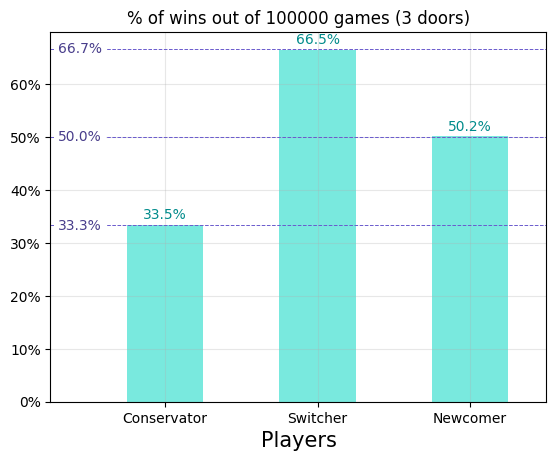

In [69]:
# Repeat the game n times

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

n = 100000     # Number of games

# Initializing the winning counts for the contestants:
conservator_wins = 0
switcher_wins = 0
newcomer_wins = 0

# Repeating the game n times:
for i in range(n):

    # Initialize the doors:
    np.random.shuffle(doors)
    
    # The conservator and switcher choose the first door:
    first_choice = np.random.randint(0, 3)

    # Picking the winning door:
    winning_door = np.where(doors=='car')[0][0]

    # Choosing the door opened by the game host:
    while(True):
        open_door = np.random.randint(0, 3)
        if (open_door != winning_door and open_door != first_choice): break
    
    # The contestants choose their respective final doors:
    conservator_door = first_choice

    while(True): 
        switcher_door = np.random.randint(0, 3)
        if (switcher_door != first_choice and switcher_door != open_door): break

    while(True):
        newcomer_door = np.random.randint(0, 3)
        if (newcomer_door != open_door): break

    # Update the scores:
    if(conservator_door == winning_door):
        conservator_wins += 1
    else:
        switcher_wins += 1
        
    if(newcomer_door == winning_door):
        newcomer_wins += 1

# Results:
print("Out of " + str(n) + " tries:")     
print("The conservator wins the car in " + str(round((conservator_wins*100/n), 1)) + "% of the tries")
print("The switcher wins the car in " + str(round((switcher_wins*100/n), 1)) + "% of the tries")
print("The newcomer wins the car in " + str(round((newcomer_wins*100/n), 1)) + "% of the tries")

# Plotting the win percentage for each contestant:
players = np.array(["Conservator", "Switcher", "Newcomer"])
wins_percentage = np.array([conservator_wins*100/n, switcher_wins*100/n, newcomer_wins*100/n])
expected_percentage = np.array([100/3, 200/3, 100/2])

fig, ax = plt.subplots()
plt.bar(players, wins_percentage, width=0.5, color='turquoise', alpha=0.7)
plt.grid(alpha=0.3)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.title('% of wins out of ' + str(n) + ' games (3 doors)')
plt.xlabel('Players', fontsize=15)
plt.xlim(-0.75, len(players) - 0.5)

for i, true_value, exp_value in zip(np.arange(len(wins_percentage)), wins_percentage, expected_percentage):
    # Print the true value on each bar:
    plt.text(i, true_value + 0.5, f'{true_value:.1f}%', ha='center', va='bottom', color='darkcyan')
    # Plot the expected value lines and stamps:
    plt.axhline(exp_value, ls='dashed',c='slateblue', linewidth=0.7)
    plt.annotate(str(round(exp_value, 1)) + '%', xy=(-0.75, exp_value), xytext=(-0.7, exp_value), verticalalignment='center', color='darkslateblue', bbox=dict(boxstyle='square', fc='white', edgecolor=(0, 0, 0, 0)))

plt.show()


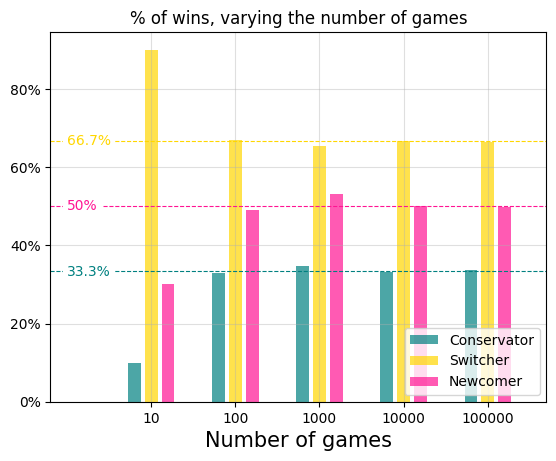

In [72]:
# How the probabilities change with respect to the number of games

n_games = np.array([10, 100, 1000, 10000, 100000])

P_conservator = []
P_switcher = []
P_newcomer = []

for n in n_games:
    
    # Initializing the winning counts for the contestants:
    conservator_wins = 0
    switcher_wins = 0
    newcomer_wins = 0
    
    # Repeating the game n times:
    for i in range(n):
    
        # Initialize the doors:
        np.random.shuffle(doors)

        # The conservator and switcher choose the first door:
        first_choice = np.random.randint(0, 3)
    
        # Picking the winning door:
        winning_door = np.where(doors=='car')[0][0]
    
        # Choosing the door opened by the game host:
        while(True):
            open_door = np.random.randint(0, 3)
            if (open_door != winning_door and open_door != first_choice): break
        
        # The contestants choose their respective final doors:
        conservator_door = first_choice

        while(True): 
            switcher_door = np.random.randint(0, 3)
            if (switcher_door != first_choice and switcher_door != open_door): break
    
        while(True):
            newcomer_door = np.random.randint(0, 3)
            if (newcomer_door != open_door): break
    
        # Update the scores:
        if(conservator_door == winning_door):
            conservator_wins += 1
        else:
            switcher_wins += 1
            
        if(newcomer_door == winning_door):
            newcomer_wins += 1

    P_conservator.append(conservator_wins*100/n)
    P_switcher.append(switcher_wins*100/n)
    P_newcomer.append(newcomer_wins*100/n)
    

# Plotting:
ticks = np.arange(len(n_games))

fig, ax = plt.subplots()
plt.bar([i - 0.2 for i in ticks], P_conservator, width=0.15, label='Conservator', color='teal', alpha = 0.7)
plt.bar(ticks, P_switcher, width=0.15, label='Switcher', color='gold', alpha = 0.7)
plt.bar([i + 0.2 for i in ticks], P_newcomer, width=0.15, label='Newcomer', color='deeppink', alpha = 0.7)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.xticks(ticks, n_games)
plt.xlabel('Number of games', fontsize=15)
plt.legend(loc = 'lower right')
plt.grid(alpha=0.4)
plt.title('% of wins, varying the number of games')

plt.xlim(-1.2, max(ticks)+0.7)     # For the expected percentage labels
plt.axhline(100/3, c='teal', lw = 0.8, ls = 'dashed')
plt.axhline(200/3, c='gold', lw = 0.8, ls = 'dashed')
plt.axhline(100/2, c='deeppink', lw = 0.8, ls = 'dashed')
plt.annotate('66.7%', xy=(-1.05, 66.7), xytext=(-1, 66.7), verticalalignment='center', color='gold', bbox=dict(boxstyle='square', fc='white', edgecolor=(0, 0, 0, 0)))
plt.annotate('50%', xy=(-1.05, 50), xytext=(-1, 50), verticalalignment='center', color='deeppink', bbox=dict(boxstyle='square', fc='white', edgecolor=(0, 0, 0, 0)))
plt.annotate('33.3%', xy=(-1.05, 33.3), xytext=(-1, 33.3), verticalalignment='center', color='teal', bbox=dict(boxstyle='square', fc='white', edgecolor=(0, 0, 0, 0)))

plt.show()

Bayes' Theorem predicts that:
- The conservator has a winning probability of $1/3$;
- The switcher has a winning probability of $2/3$;
- The newcomer has a winning probability of $1/2$.
  
By repeating the game many times, the fraction of wins for each player aligns with the expected probability.


## Part 2: 100 doors, 98 opened
What would happen if you had 100 doors to choose from and the presenter opens 98 or them?


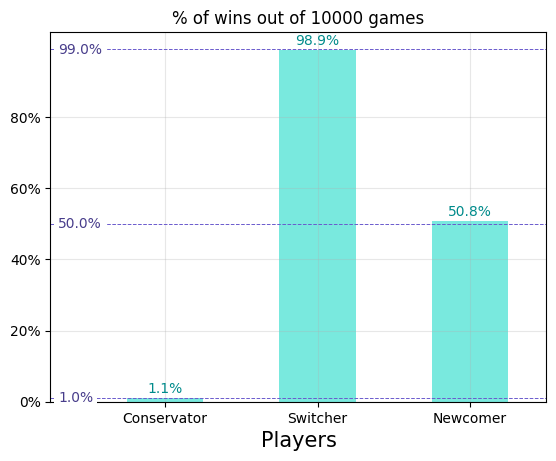

In [62]:
##########################################################

def doors_opening(N_doors, winning_door, first_choice, doors_to_open):
    # Returns all the doors (by door number, not by index) opened by the host, excluding the winning door and the first contestant choice.
    # If the first choice is the winning door, one random door is left closed.
    # All inputs are integers.
    # NOTE: while this function works in general, I found it to be slower than the while loops if applied for the 3 doors case, so I preferred the
    #       loops for the first case.

    if (doors_to_open > (N_doors-2)): 
        print('ERROR: at least two doors have to stay closed. Check the total number of doors and the number of doors to be opened.')
        return

    all_doors = np.array(range(N_doors)) # Array of indexes for all the doors
    
    # Creating the mask for the doors to be removed from the host's possible choices: first the winning door, then the players' first choice. 
    doors_to_remove = np.array([winning_door]) 
    if (first_choice != winning_door): doors_to_remove = np.append(doors_to_remove, first_choice)
    
    # The host can choose between the remaining_doors:
    remaining_doors_mask = ~np.isin(all_doors, doors_to_remove)    # (The tilde is the NOT operator: True becomes False and vice versa)
    
    doors_opened = np.random.choice(all_doors[remaining_doors_mask], doors_to_open, replace = False)

    # The following doors are still closed:
    closed_doors_mask = ~np.isin(all_doors, doors_opened)
    doors_still_closed = all_doors[closed_doors_mask]

    return np.sort(doors_opened), np.sort(doors_still_closed)

###############################################################################

N = 100     # Total number of doors
M = N-2     # Number of doors opened by the host
n = 100000

conservator_wins = 0
switcher_wins = 0
newcomer_wins = 0

# Initialize the prizes behind each door:
doors = np.array(['goat'] * (N-1) + ['car'])
    
for i in range(n):
    shuffle(doors)
    
    # The switcher and conservators choose the first door:
    first_choice = np.random.randint(0, N)
    
    # Picking the winning door:
    winning_door = np.where(doors=='car')[0][0]
    
    # The host opens M=N-2 doors (1 in this case); the contestants can choose between the 2 closed doors remaining:
    doors_opened, doors_still_closed = doors_opening(N, winning_door, first_choice, M)
    
    # The contestants choose their respective final doors:
    conservator_door = first_choice
    switcher_door = np.random.choice(doors_still_closed[~np.isin(doors_still_closed, first_choice)])
    newcomer_door = np.random.choice(doors_still_closed, 1)[0]
    
    # Update the scores:
    if(conservator_door == winning_door):
        conservator_wins += 1
    else:
        switcher_wins += 1
            
    if(newcomer_door == winning_door):
        newcomer_wins += 1

# Plotting the win percentage for each contestant:
players = np.array(["Conservator", "Switcher", "Newcomer"])
wins_percentage = np.array([conservator_wins*100/n, switcher_wins*100/n, newcomer_wins*100/n])
expected_percentage = np.array([100/100, 9900/100, 100/2])

fig, ax = plt.subplots()
plt.bar(players, wins_percentage, width=0.5, color='turquoise', alpha=0.7)
plt.grid(alpha=0.3)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.title('% of wins out of ' + str(n) + ' games (100 doors)')
plt.xlabel('Players', fontsize=15)
plt.xlim(-0.75, len(players) - 0.5)

for i, true_value, exp_value in zip(np.arange(len(wins_percentage)), wins_percentage, expected_percentage):
    # Print the true value on each bar:
    plt.text(i, true_value + 0.5, f'{true_value:.1f}%', ha='center', va='bottom', color='darkcyan')
    # Plot the expected value lines and stamps:
    plt.axhline(exp_value, ls='dashed',c='slateblue', linewidth=0.7)
    plt.annotate(str(round(exp_value, 1)) + '%', xy=(-0.75, exp_value), xytext=(-0.7, exp_value), verticalalignment='center', color='darkslateblue', bbox=dict(boxstyle='square', fc='white', edgecolor=(0, 0, 0, 0)))

plt.show()

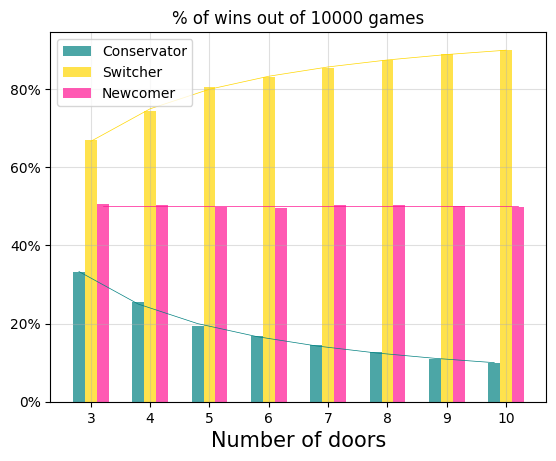

In [73]:
# How the probabilities change with respect to the number of doors N (with M = N-2 doors opened by the host)
# FOR LOW N (so that the probabilities are still plottable together)

DOORS = np.array([3, 4, 5, 6, 7, 8, 9, 10])
n = 10000

P_conservator = []
P_switcher = []
P_newcomer = []

P_exp_conservator = []
P_exp_switcher = []
P_exp_newcomer = []

for N in DOORS:
    M = N-2
    
    conservator_wins = 0
    switcher_wins = 0
    newcomer_wins = 0
    
    # Initialize the prizes behind each door:
    doors = np.array(['goat'] * (N-1) + ['car'])
        
    for i in range(n):
        shuffle(doors)
        
        # The switcher and conservators choose the first door:
        first_choice = np.random.randint(0, N)

        # Picking the winning door:
        winning_door = np.where(doors=='car')[0][0]
        
        # The host opens M=N-2 doors (1 in this case); the contestants can choose between the 2 closed doors remaining:
        doors_opened, doors_still_closed = doors_opening(N, winning_door, first_choice, M)
        
        # The contestants choose their respective final doors:
        conservator_door = first_choice
        switcher_door = np.random.choice(doors_still_closed[~np.isin(doors_still_closed, first_choice)])
        newcomer_door = np.random.choice(doors_still_closed, 1)[0]

        # Update the scores:
        if(conservator_door == winning_door):
            conservator_wins += 1
        else:
            switcher_wins += 1
                
        if(newcomer_door == winning_door):
            newcomer_wins += 1

    P_conservator.append(conservator_wins*100/n)
    P_switcher.append(switcher_wins*100/n)
    P_newcomer.append(newcomer_wins*100/n)

    P_exp_conservator.append((1/N)*100)
    P_exp_switcher.append(((N-1)/N)*100)
    P_exp_newcomer.append(100/2)

fig, ax = plt.subplots()
plt.bar([i - 0.2 for i in DOORS], P_conservator, width=0.2, label='Conservator', color='teal', alpha = 0.7)
plt.bar(DOORS, P_switcher, width=0.2, label='Switcher', color='gold', alpha = 0.7)
plt.bar([i + 0.2 for i in DOORS], P_newcomer, width=0.2, label='Newcomer', color='deeppink', alpha = 0.7)
plt.plot([i - 0.2 for i in DOORS], P_exp_conservator, linewidth = 0.5, color = 'teal')
plt.plot(DOORS, P_exp_switcher, linewidth = 0.5, color = 'gold')
plt.plot([i + 0.2 for i in DOORS], P_exp_newcomer, linewidth = 0.5, color = 'deeppink')
plt.legend()
plt.grid(alpha=0.4)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.title('% of wins out of ' + str(n) + ' games')
plt.xlabel('Number of doors', fontsize=15)
plt.show()

[2.02, 0.73, 0.35, 0.19, 0.16, 0.08]
[2.0, 1.0, 0.4, 0.2, 0.13333333333333333, 0.1]


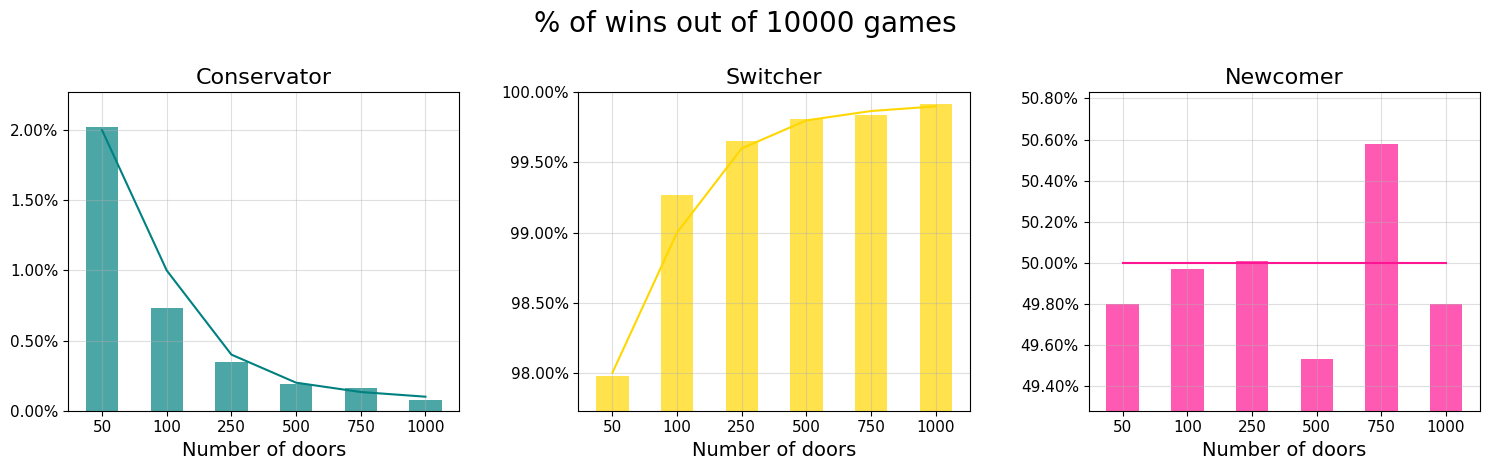

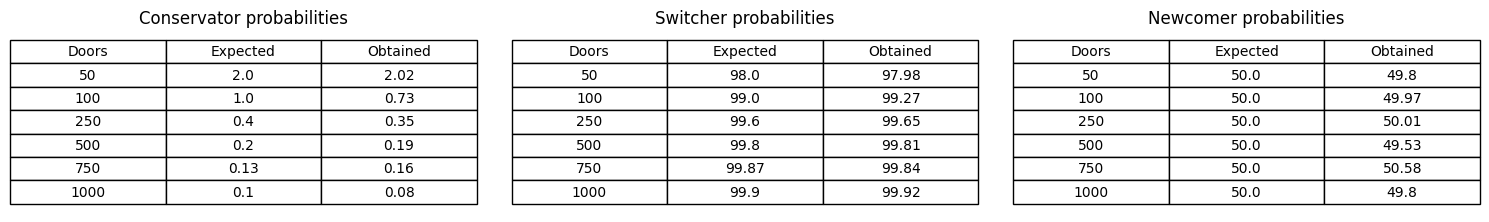

In [130]:
# How the probabilities change with respect to the number of doors N (with M = N-2 doors opened by the host)
# FOR HIGH N (three different plots)

DOORS = np.array([50, 100, 250, 500, 750, 1000])
n = 10000

P_conservator = []
P_switcher = []
P_newcomer = []

P_exp_conservator = []
P_exp_switcher = []
P_exp_newcomer = []

for N in DOORS:
    M = N-2
    
    conservator_wins = 0
    switcher_wins = 0
    newcomer_wins = 0
    
    # Initialize the prizes behind each door:
    doors = np.array(['goat'] * (N-1) + ['car'])
        
    for i in range(n):
        shuffle(doors)
        
        # The switcher and conservators choose the first door:
        first_choice = np.random.randint(0, N)

        # Picking the winning door:
        winning_door = np.where(doors=='car')[0][0]
        
        # The host opens M=N-2 doors (1 in this case); the contestants can choose between the 2 closed doors remaining:
        doors_opened, doors_still_closed = doors_opening(N, winning_door, first_choice, M)
        
        # The contestants choose their respective final doors:
        conservator_door = first_choice
        switcher_door = np.random.choice(doors_still_closed[~np.isin(doors_still_closed, first_choice)])
        newcomer_door = np.random.choice(doors_still_closed, 1)[0]

        # Update the scores:
        if(conservator_door == winning_door):
            conservator_wins += 1
        else:
            switcher_wins += 1
                
        if(newcomer_door == winning_door):
            newcomer_wins += 1

    P_conservator.append(conservator_wins*100/n)
    P_switcher.append(switcher_wins*100/n)
    P_newcomer.append(newcomer_wins*100/n)

    P_exp_conservator.append((1/N)*100)
    P_exp_switcher.append(((N-1)/N)*100)
    P_exp_newcomer.append(100/2)

print(P_conservator)
print(P_exp_conservator)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('% of wins out of ' + str(n) + ' games', fontsize = 20)
ticks = np.arange(len(DOORS))

ax[0].bar(ticks, P_conservator, width=0.5, color='teal', alpha = 0.7)
ax[0].plot(ticks, P_exp_conservator, color = 'teal')
ax[0].grid(alpha=0.4)
ax[0].yaxis.set_major_formatter(PercentFormatter(xmax=100))
ax[0].set_ylim(0, max(P_conservator)+0.25)
ax[0].set_xticks(ticks, DOORS)
ax[0].tick_params(labelsize=11) 
ax[0].set_title('Conservator', fontsize=16)
ax[0].set_xlabel('Number of doors', fontsize=14)

ax[1].bar(ticks, P_switcher, width=0.5, color='gold', alpha = 0.7)
ax[1].plot(ticks, P_exp_switcher, color = 'gold')
ax[1].grid(alpha=0.4)
ax[1].yaxis.set_major_formatter(PercentFormatter(xmax=100))
ax[1].set_ylim(min(P_switcher)-0.25, 100)
ax[1].set_xticks(ticks, DOORS)
ax[1].tick_params(labelsize=11) 
ax[1].set_title('Switcher', fontsize=16)
ax[1].set_xlabel('Number of doors', fontsize=14)

ax[2].bar(ticks, P_newcomer, width=0.5, color='deeppink', alpha = 0.7)
ax[2].plot(ticks, P_exp_newcomer, color = 'deeppink')
ax[2].grid(alpha=0.4)
ax[2].yaxis.set_major_formatter(PercentFormatter(xmax=100))
ax[2].set_ylim(min(P_newcomer)-0.25, max(P_newcomer)+0.25)
ax[2].set_xticks(ticks, DOORS)
ax[2].tick_params(labelsize=11) 
ax[2].set_title('Newcomer', fontsize=16)
ax[2].set_xlabel('Number of doors', fontsize=14)

plt.tight_layout(rect=[0, 0.05, 1, 0.98], w_pad=3.0)

plt.show()

# Showing the results in tables
cons_data = np.column_stack((['Doors'] + [str(door) for door in DOORS], ['Expected'] + [str(exp) for exp in np.round(P_exp_conservator, 2)], ['Obtained'] + [str(obt) for obt in np.round(P_conservator, 2)]))
switch_data = np.column_stack((['Doors'] + [str(door) for door in DOORS], ['Expected'] + [str(exp) for exp in np.round(P_exp_switcher, 2)], ['Obtained'] + [str(obt) for obt in np.round(P_switcher, 2)]))
newc_data = np.column_stack((['Doors'] + [str(door) for door in DOORS], ['Expected'] + [str(exp) for exp in np.round(P_exp_newcomer, 2)], ['Obtained'] + [str(obt) for obt in np.round(P_newcomer, 2)]))

tab, axs = plt.subplots(1, 3, figsize=(15, 2.5))

axs[0].set_title('Conservator probabilities')
axs[0].axis('off')
table1 = axs[0].table(cellText=cons_data, loc='center', cellLoc='center', colLabels=None)
table1.scale(1, 1.5)

axs[1].set_title('Switcher probabilities')
axs[1].axis('off') 
table2 = axs[1].table(cellText=switch_data, loc='center', cellLoc='center', colLabels=None)
table2.scale(1, 1.5)

axs[2].set_title('Newcomer probabilities')
axs[2].axis('off')
table3 = axs[2].table(cellText=newc_data, loc='center', cellLoc='center', colLabels=None)
table3.scale(1, 1.5)

plt.tight_layout(rect=[0, 0.05, 1, 0.98], w_pad=2.5)

plt.show()

In [ ]:
# THEORY CONSIDERATIONS
# Metti errore percentuale
# Metti tabella anche sopra














## Part 3: N doors, M opened
What if you had $N$ doors to choose from and the presenter opens $M<N-2$ of them? Study how the probability of winning changes as a function of $M$ and $N$.